In [1]:
import pandas as pd
import os


In [2]:
# 동적으로 구성할 디렉토리와 파일명
base_dir = 'C:/Project/RAG연구동향분석/250409'  # 여기를 바꿔서 동적으로 사용

In [56]:
df = pd.read_parquet('C:/Project/RAG연구동향분석/250409/l123_paper.parquet')
df.head()

,id,title,year,n_citation,venue,keywords,fos.name,references,L1,L2,L3
0,53e9979bb7602d9701f66d44,Defeasible logic,2001,370,Handbook of logic in artificial intelligence a...,"[newspaper story warning, reasonable person, c...",[],"[53e9979bb7602d9701f66d44, 53e9981db7602d97020...",0.0,0.0,1.0
1,53e99808b7602d970201a746,Computing with shapes,2001,29,Computing with shapes,"[computability model, turing machine, shape gr...","[Data mining, Computer science, Polyomino, Rec...","[53e99866b7602d97020a09de, 53e99d6cb7602d97026...",0.0,0.0,1.0
2,53e9983db7602d9702065c32,Language and memory,1980,489,Readings in natural language processing,"[representation theory, computer simulation, a...","[Episodic memory, Categorization, Computer sci...","[53e99b10b7602d97023a07e7, 53e9a06cb7602d97029...",0.0,0.0,1.0
3,53e99a56b7602d97022bc23a,A truth maintenance system,1979,3043,Readings in nonmonotonic reasoning,"[truth maintenance system, computer programmin...","[Embedding, Course of action, Argument, Comput...","[53e99827b7602d970204c670, 53e99a79b7602d97022...",0.0,0.0,1.0
4,53e99e0cb7602d97026d141c,Microcomputer playfulness: development of a me...,1992,716,MIS Quarterly,"[workplace implication, microcomputer playfuln...","[Knowledge management, Computer training, Psyc...","[53e9a291b7602d9702b98e06, 53e9a914b7602d97032...",0.0,0.0,1.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82532 entries, 0 to 82531
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          82532 non-null  object 
 1   title       82532 non-null  object 
 2   year        82532 non-null  int64  
 3   n_citation  82532 non-null  int64  
 4   venue       82532 non-null  object 
 5   keywords    82532 non-null  object 
 6   fos.name    82532 non-null  object 
 7   references  82532 non-null  object 
 8   L1          82532 non-null  float64
 9   L2          82532 non-null  float64
 10  L3          82532 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 6.9+ MB


In [35]:
# 기간 정의 (이전 코드와 동일)
period_definitions = {
    'period1': {'start': df['year'].min(), 'end': 1999},
    'period2': {'start': 2000, 'end': 2003},
    'period3': {'start': 2004, 'end': 2007},
    'period4': {'start': 2008, 'end': 2011},
    'period5': {'start': 2012, 'end': 2015},
    'period6': {'start': 2016, 'end': 2019},
    'period7': {'start': 2020, 'end': 2022}
}


In [36]:
# 2. 기간 할당 함수 정의 (이전과 동일)
def assign_period(year):
    for period, definition in period_definitions.items():
        if definition['start'] <= year <= definition['end']:
            return period
    return None # 어떤 기간에도 속하지 않는 경우 (예: 2023년 이후 데이터)

# 3. 'period' 열 생성 (이전과 동일)
df['period'] = df['year'].apply(assign_period)

# 4. 원본 데이터프레임에서 기간별 논문 수 확인
print("원본 데이터프레임의 기간별 논문 수 확인 (period7: 2020-2022):")

# 정의된 기간 순서대로 결과를 보기 위해 Categorical 타입 사용
period_order = list(period_definitions.keys())
# df['period'] 열에 없는 기간도 결과에 포함시키기 위해 reindex 사용
period_counts_original = df['period'].value_counts().reindex(period_order, fill_value=0)

print(period_counts_original)

# 기간 정의도 함께 출력하여 확인 용이
print("\n사용된 기간 정의:")
for period, definition in period_definitions.items():
    print(f"{period}: {definition['start']} - {definition['end']}")

# 정의된 기간 외 데이터 확인 (선택 사항)
unassigned_count = df['period'].isnull().sum()
if unassigned_count > 0:
    print(f"\n참고: 정의된 기간({period_definitions['period7']['end']}년까지)에 포함되지 않는 논문 수: {unassigned_count}")

원본 데이터프레임의 기간별 논문 수 확인 (period7: 2020-2022):
period
period1     6632
period2     7104
period3    14120
period4    20012
period5    21152
period6    12406
period7     1106
Name: count, dtype: int64

사용된 기간 정의:
period1: 1958 - 1999
period2: 2000 - 2003
period3: 2004 - 2007
period4: 2008 - 2011
period5: 2012 - 2015
period6: 2016 - 2019
period7: 2020 - 2022


In [37]:
# 기간 1 ~ 7 분리

# 'year' 컬럼 전처리 (이전 코드와 동일)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)


# --- 각 기간별로 별도의 데이터프레임 변수 생성 ---
print("데이터프레임을 기간별로 분할 중...")

df_period1 = df[(df['year'] >= period_definitions['period1']['start']) & (df['year'] <= period_definitions['period1']['end'])].copy()
df_period2 = df[(df['year'] >= period_definitions['period2']['start']) & (df['year'] <= period_definitions['period2']['end'])].copy()
df_period3 = df[(df['year'] >= period_definitions['period3']['start']) & (df['year'] <= period_definitions['period3']['end'])].copy()
df_period4 = df[(df['year'] >= period_definitions['period4']['start']) & (df['year'] <= period_definitions['period4']['end'])].copy()
df_period5 = df[(df['year'] >= period_definitions['period5']['start']) & (df['year'] <= period_definitions['period5']['end'])].copy()
df_period6 = df[(df['year'] >= period_definitions['period6']['start']) & (df['year'] <= period_definitions['period6']['end'])].copy()
df_period7 = df[(df['year'] >= period_definitions['period7']['start']) & (df['year'] <= period_definitions['period7']['end'])].copy()

print("분할 완료.")

# 결과 확인 (각 데이터프레임 변수의 행 수 출력)
print("\n기간별 생성된 데이터프레임과 논문 수:")
print(f"df_period1 (~{period_definitions['period1']['end']}): {len(df_period1)} 개 논문")
print(f"df_period2 ({period_definitions['period2']['start']}-{period_definitions['period2']['end']}): {len(df_period2)} 개 논문")
print(f"df_period3 ({period_definitions['period3']['start']}-{period_definitions['period3']['end']}): {len(df_period3)} 개 논문")
print(f"df_period4 ({period_definitions['period4']['start']}-{period_definitions['period4']['end']}): {len(df_period4)} 개 논문")
print(f"df_period5 ({period_definitions['period5']['start']}-{period_definitions['period5']['end']}): {len(df_period5)} 개 논문")
print(f"df_period6 ({period_definitions['period6']['start']}-{period_definitions['period6']['end']}): {len(df_period6)} 개 논문")
print(f"df_period7 ({period_definitions['period7']['start']}-{period_definitions['period7']['end']}): {len(df_period7)} 개 논문")

데이터프레임을 기간별로 분할 중...
분할 완료.

기간별 생성된 데이터프레임과 논문 수:
df_period1 (~1999): 6632 개 논문
df_period2 (2000-2003): 7104 개 논문
df_period3 (2004-2007): 14120 개 논문
df_period4 (2008-2011): 20012 개 논문
df_period5 (2012-2015): 21152 개 논문
df_period6 (2016-2019): 12406 개 논문
df_period7 (2020-2022): 1106 개 논문


In [38]:
file_name = 'l123_p1.parquet'
output_path = os.path.join(base_dir, file_name)
df_period1.to_parquet(output_path, index=False)

file_name = 'l123_p2.parquet'
output_path = os.path.join(base_dir, file_name)
df_period2.to_parquet(output_path, index=False)

file_name = 'l123_p3.parquet'
output_path = os.path.join(base_dir, file_name)
df_period3.to_parquet(output_path, index=False)

file_name = 'l123_p4.parquet'
output_path = os.path.join(base_dir, file_name)
df_period4.to_parquet(output_path, index=False)

file_name = 'l123_p5.parquet'
output_path = os.path.join(base_dir, file_name)
df_period5.to_parquet(output_path, index=False)

file_name = 'l123_p6.parquet'
output_path = os.path.join(base_dir, file_name)
df_period6.to_parquet(output_path, index=False)

file_name = 'l123_p7.parquet'
output_path = os.path.join(base_dir, file_name)
df_period7.to_parquet(output_path, index=False)

In [39]:
# 기간 1~6 종합 파일

print("\n기간 1부터 6까지의 데이터프레임 병합 중...")

# 합칠 데이터프레임들을 리스트로 묶기
frames_to_concat = [df_period1, df_period2, df_period3, df_period4, df_period5, df_period6]

# pandas.concat을 사용하여 리스트 안의 데이터프레임들을 합침
# ignore_index=True: 합쳐진 데이터프레임의 인덱스를 새로 부여 (0부터 시작)
df_periods1_to_6 = pd.concat(frames_to_concat, ignore_index=True)

print("병합 완료.")

# 병합된 데이터프레임 확인
print(f"\n기간 1~6 병합 데이터프레임 (df_periods1_to_6) 정보:")
df_periods1_to_6.info()
print(f"\n총 논문 수: {len(df_periods1_to_6)}")

# 예상 논문 수 계산 (검증용)
expected_count = len(df_period1) + len(df_period2) + len(df_period3) + len(df_period4) + len(df_period5) + len(df_period6)
print(f"예상 논문 수 (기간1~6 합계): {expected_count}")
print(f"병합 결과 논문 수 일치 여부: {len(df_periods1_to_6) == expected_count}")

print("\n기간 1~6 병합 데이터프레임 샘플 (처음 5개):")
print(df_periods1_to_6.head())
print("\n기간 1~6 병합 데이터프레임 샘플 (마지막 5개):")
print(df_periods1_to_6.tail())


기간 1부터 6까지의 데이터프레임 병합 중...
병합 완료.

기간 1~6 병합 데이터프레임 (df_periods1_to_6) 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81426 entries, 0 to 81425
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          81426 non-null  object 
 1   title       81426 non-null  object 
 2   year        81426 non-null  int64  
 3   n_citation  81426 non-null  int64  
 4   venue       81426 non-null  object 
 5   keywords    81426 non-null  object 
 6   fos.name    81426 non-null  object 
 7   references  81426 non-null  object 
 8   L1          81426 non-null  float64
 9   L2          81426 non-null  float64
 10  L3          81426 non-null  float64
 11  period      81426 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 7.5+ MB

총 논문 수: 81426
예상 논문 수 (기간1~6 합계): 81426
병합 결과 논문 수 일치 여부: True

기간 1~6 병합 데이터프레임 샘플 (처음 5개):
                         id  \
0  53e9983db7602d9702065c32   
1  53e99a56b7602d97022b

In [40]:
file_name = 'l123_p1-6.parquet'
output_path = os.path.join(base_dir, file_name)
df_periods1_to_6.to_parquet(output_path, index=False)

In [41]:
# (Gephi 파일 준비 함수 및 호출 코드는 이전과 동일하게 유지)
def prepare_gephi_files(period_df, period_name):
    """주어진 기간 데이터프레임에서 Gephi용 노드/엣지 데이터프레임 생성"""
    if period_df.empty:
        print(f"{period_name}: 데이터프레임이 비어있어 Gephi 파일을 생성할 수 없습니다.")
        return None, None

    nodes_df = period_df[['id', 'title', 'year', 'n_citation', 'venue', 'keywords', 'fos.name', 'L1', 'L2', 'L3']].copy()
    nodes_df.rename(columns={'id': 'Id'}, inplace=True)
    nodes_df['Label'] = nodes_df['title']

    edges_list = []
    valid_node_ids = set(nodes_df['Id'])

    for index, row in period_df.iterrows():
        source_id = row['Id'] # 'Id'로 변경된 이름 사용
        references_raw = row['references']

        target_ids = []
        if isinstance(references_raw, str) and references_raw.startswith('[') and references_raw.endswith(']'):
            try:
                potential_ids = ast.literal_eval(references_raw)
                if isinstance(potential_ids, list):
                    target_ids = [str(tid).strip() for tid in potential_ids]
            except (ValueError, SyntaxError, TypeError) as e:
                references_str = references_raw.strip('[] ')
                if references_str:
                    target_ids = [ref.strip() for ref in references_str.split(',')]

        for target_id in target_ids:
             # Target이 비어있지 않은 경우만 추가
            if target_id:
                 edges_list.append([source_id, target_id])


    edges_df = pd.DataFrame(edges_list, columns=['Source', 'Target'])
    if not edges_df.empty:
        edges_df['Type'] = 'Directed'

    return nodes_df, edges_df


---
---

In [42]:
import pandas as pd
import numpy as np
import re

# -------------------- 노드 파일 생성 --------------------
def clean_text(text):
    if isinstance(text, str):
        # 알파벳, 숫자, 공백을 제외한 모든 문자를 공백으로 변환
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
        # 연속된 공백을 하나의 공백으로 변환
        text = re.sub(r'\s+', ' ', text)
        return text.strip()
    return str(text)

def clean_list(lst):
    if isinstance(lst, np.ndarray):
        lst = lst.tolist()
    if isinstance(lst, str):
        try:
            lst = eval(lst)
        except:
            return ''
    if isinstance(lst, list):
        # 각 항목에서 특수문자를 공백으로 변환
        cleaned = [clean_text(str(item)) for item in lst if item]
        return ' | '.join(cleaned)
    return ''

# 노드 데이터 생성
def create_node_file(df, output_path='gephi_nodes.csv'):
    # 노드 기본 정보
    nodes = df[['id', 'title', 'year', 'n_citation']].copy()
    nodes.columns = ['Id', 'Label', 'Year', 'Citations']
    
    # Label 정제
    nodes['Label'] = nodes['Label'].apply(clean_text)
    
    # 추가 속성
    nodes['Research_Fields'] = df['fos.name'].apply(clean_list)
    nodes['Keywords'] = df['keywords'].apply(clean_list)
    
    # Level 정보 추가
    nodes['Level'] = df.apply(lambda row: 
        'L1' if row.get('L1') == 1 else 
        'L2' if row.get('L2') == 1 else 
        'L3' if row.get('L3') == 1 else 'Other', axis=1)
    
    # CSV 파일로 저장
    nodes.to_csv(output_path, index=False, encoding='utf-8-sig', quoting=1)
    
    print(f"노드 파일이 생성되었습니다: {output_path}")
    print(f"총 노드 수: {len(nodes)}")
    
    return nodes

# -------------------- 엣지 파일 생성 --------------------
def create_edge_file(df, output_path='gephi_edges.csv', bidirectional=False):
    # 엣지 리스트를 저장할 빈 리스트 생성
    edges = []
    node_ids = set(df['id'].values)  # 노드 ID 집합 (선택적 필터링용)
    
    # 각 논문에 대해 엣지 생성
    for idx, row in df.iterrows():
        source_id = row['id']
        refs = row['references']
        
        # references가 None이면 건너뛰기
        if refs is None:
            continue
        
        try:
            # NumPy 배열인 경우 리스트로 변환
            if isinstance(refs, np.ndarray):
                refs = refs.tolist()
            # 문자열인 경우 리스트로 변환 시도
            elif isinstance(refs, str):
                if refs.startswith('[') and refs.endswith(']'):
                    refs_str = refs.strip('[]')
                    if refs_str:
                        refs = [ref.strip().strip('\'\" ') for ref in refs_str.split(',')]
                    else:
                        refs = []
                else:
                    refs = [refs]  # 단일 문자열을 리스트로
            
            # 다른 타입이거나 리스트가 아니면 빈 리스트로
            if not isinstance(refs, list):
                refs = []
                
            # 각 참조 논문에 대해 엣지 생성
            for ref in refs:
                # 문자열이 아니면 문자열로 변환
                if not isinstance(ref, str):
                    ref = str(ref)
                
                ref = ref.strip().strip('\'\" ')
                
                # 빈 문자열이면 건너뛰기
                if not ref:
                    continue
                
                # 양방향 엣지 생성 옵션
                if bidirectional:
                    edges.append({
                        'Source': source_id,
                        'Target': ref,
                        'Type': 'Cites'  # A가 B를 인용
                    })
                    edges.append({
                        'Source': ref,
                        'Target': source_id,
                        'Type': 'Cited by'  # B가 A에 의해 인용됨
                    })
                else:
                    edges.append({
                        'Source': source_id,
                        'Target': ref,
                        'Type': 'Directed',
                        'Weight': 1
                    })
                
        except Exception as e:
            print(f"행 처리 중 오류 (ID {source_id}): {e}")
            continue
    
    # 엣지가 없으면 빈 데이터프레임 반환
    if not edges:
        print("생성된 엣지가 없습니다.")
        return pd.DataFrame()
    
    # 엣지 리스트를 데이터프레임으로 변환
    edge_df = pd.DataFrame(edges)
    
    # 중복 제거
    edge_df = edge_df.drop_duplicates(['Source', 'Target'])
    
    # CSV 파일로 저장
    edge_df.to_csv(output_path, index=False, encoding='utf-8-sig')
    
    # 통계 출력
    print(f"엣지 파일이 생성되었습니다: {output_path}")
    print(f"총 엣지 수: {len(edge_df)}")
    print(f"Source 노드 수: {len(edge_df['Source'].unique())}")
    print(f"Target 노드 수: {len(edge_df['Target'].unique())}")
    
    return edge_df


In [43]:
# 기간 1~6 네트워크파일 만들기
merged_df = df_periods1_to_6

# -------------------- 실행 코드 --------------------
# 노드 파일 생성
node_df = create_node_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_nodes(p1-6).csv')

# References 열 샘플 확인
print("\nReferences 열 샘플 확인:")
sample_refs = merged_df['references'].iloc[0]
print(f"타입: {type(sample_refs)}")
print(f"값: {sample_refs}")

# 단방향 엣지 파일 생성
print("\n단방향 엣지 파일 생성 중...")
edge_df = create_edge_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_edges(p1-6).csv', bidirectional=False)

# 결과 분석
if not edge_df.empty:
    # 노드 ID와 엣지에 포함된 노드 ID 비교
    node_ids = set(node_df['Id'])
    edge_nodes = set(edge_df['Source'].unique()) | set(edge_df['Target'].unique())
    
    print("\n노드-엣지 비교:")
    print(f"노드 파일의 고유 노드 수: {len(node_ids)}")
    print(f"엣지 파일에 포함된 고유 노드 수: {len(edge_nodes)}")
    print(f"노드 파일에 있으나 엣지에 없는 노드 수: {len(node_ids - edge_nodes)}")
    
    # 엣지 데이터 샘플 확인
    print("\n엣지 데이터 샘플 (처음 5개):")
    print(edge_df.head())

노드 파일이 생성되었습니다: C:/Project/RAG연구동향분석/250409/gephi_nodes(p1-6).csv
총 노드 수: 81426

References 열 샘플 확인:
타입: <class 'numpy.ndarray'>
값: ['53e99b10b7602d97023a07e7' '53e9a06cb7602d970295176e'
 '53e9ac3db7602d9703605ee6' '53e9ba64b7602d9704680dab'
 '53e9a308b7602d9702c0f96c' '573696736e3b12023e57f53e']

단방향 엣지 파일 생성 중...
엣지 파일이 생성되었습니다: C:/Project/RAG연구동향분석/250409/gephi_edges(p1-6).csv
총 엣지 수: 1365486
Source 노드 수: 81426
Target 노드 수: 307413

노드-엣지 비교:
노드 파일의 고유 노드 수: 81426
엣지 파일에 포함된 고유 노드 수: 329652
노드 파일에 있으나 엣지에 없는 노드 수: 0

엣지 데이터 샘플 (처음 5개):
                     Source                    Target      Type  Weight
0  53e9983db7602d9702065c32  53e99b10b7602d97023a07e7  Directed       1
1  53e9983db7602d9702065c32  53e9a06cb7602d970295176e  Directed       1
2  53e9983db7602d9702065c32  53e9ac3db7602d9703605ee6  Directed       1
3  53e9983db7602d9702065c32  53e9ba64b7602d9704680dab  Directed       1
4  53e9983db7602d9702065c32  53e9a308b7602d9702c0f96c  Directed       1


In [44]:
# 기간 1 네트워크파일 만들기
merged_df = df_period1

# -------------------- 실행 코드 --------------------
# 노드 파일 생성
node_df = create_node_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_nodes(p1).csv')

# References 열 샘플 확인
print("\nReferences 열 샘플 확인:")
sample_refs = merged_df['references'].iloc[0]
print(f"타입: {type(sample_refs)}")
print(f"값: {sample_refs}")

# 단방향 엣지 파일 생성
print("\n단방향 엣지 파일 생성 중...")
edge_df = create_edge_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_edges(p1).csv', bidirectional=False)

# 결과 분석
if not edge_df.empty:
    # 노드 ID와 엣지에 포함된 노드 ID 비교
    node_ids = set(node_df['Id'])
    edge_nodes = set(edge_df['Source'].unique()) | set(edge_df['Target'].unique())
    
    print("\n노드-엣지 비교:")
    print(f"노드 파일의 고유 노드 수: {len(node_ids)}")
    print(f"엣지 파일에 포함된 고유 노드 수: {len(edge_nodes)}")
    print(f"노드 파일에 있으나 엣지에 없는 노드 수: {len(node_ids - edge_nodes)}")
    
    # 엣지 데이터 샘플 확인
    print("\n엣지 데이터 샘플 (처음 5개):")
    print(edge_df.head())

노드 파일이 생성되었습니다: C:/Project/RAG연구동향분석/250409/gephi_nodes(p1).csv
총 노드 수: 6632

References 열 샘플 확인:
타입: <class 'numpy.ndarray'>
값: ['53e99b10b7602d97023a07e7' '53e9a06cb7602d970295176e'
 '53e9ac3db7602d9703605ee6' '53e9ba64b7602d9704680dab'
 '53e9a308b7602d9702c0f96c' '573696736e3b12023e57f53e']

단방향 엣지 파일 생성 중...
엣지 파일이 생성되었습니다: C:/Project/RAG연구동향분석/250409/gephi_edges(p1).csv
총 엣지 수: 66569
Source 노드 수: 6632
Target 노드 수: 25390

노드-엣지 비교:
노드 파일의 고유 노드 수: 6632
엣지 파일에 포함된 고유 노드 수: 28083
노드 파일에 있으나 엣지에 없는 노드 수: 0

엣지 데이터 샘플 (처음 5개):
                     Source                    Target      Type  Weight
0  53e9983db7602d9702065c32  53e99b10b7602d97023a07e7  Directed       1
1  53e9983db7602d9702065c32  53e9a06cb7602d970295176e  Directed       1
2  53e9983db7602d9702065c32  53e9ac3db7602d9703605ee6  Directed       1
3  53e9983db7602d9702065c32  53e9ba64b7602d9704680dab  Directed       1
4  53e9983db7602d9702065c32  53e9a308b7602d9702c0f96c  Directed       1


In [45]:
# 기간 2 네트워크파일 만들기
merged_df = df_period2

# -------------------- 실행 코드 --------------------
# 노드 파일 생성
node_df = create_node_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_nodes(p2).csv')

# References 열 샘플 확인
print("\nReferences 열 샘플 확인:")
sample_refs = merged_df['references'].iloc[0]
print(f"타입: {type(sample_refs)}")
print(f"값: {sample_refs}")

# 단방향 엣지 파일 생성
print("\n단방향 엣지 파일 생성 중...")
edge_df = create_edge_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_edges(p2).csv', bidirectional=False)

# 결과 분석
if not edge_df.empty:
    # 노드 ID와 엣지에 포함된 노드 ID 비교
    node_ids = set(node_df['Id'])
    edge_nodes = set(edge_df['Source'].unique()) | set(edge_df['Target'].unique())
    
    print("\n노드-엣지 비교:")
    print(f"노드 파일의 고유 노드 수: {len(node_ids)}")
    print(f"엣지 파일에 포함된 고유 노드 수: {len(edge_nodes)}")
    print(f"노드 파일에 있으나 엣지에 없는 노드 수: {len(node_ids - edge_nodes)}")
    
    # 엣지 데이터 샘플 확인
    print("\n엣지 데이터 샘플 (처음 5개):")
    print(edge_df.head())

노드 파일이 생성되었습니다: C:/Project/RAG연구동향분석/250409/gephi_nodes(p2).csv
총 노드 수: 7104

References 열 샘플 확인:
타입: <class 'numpy.ndarray'>
값: ['53e9979bb7602d9701f66d44' '53e9981db7602d970203b7b2'
 '53e99a98b7602d97023101c5' '53e9ab3eb7602d97034d0b36'
 '53e9ab69b7602d9703504883' '53e9ab97b7602d97035445ad'
 '53e9ab97b7602d9703544579' '53e9aef1b7602d9703922317'
 '53e9af26b7602d9703962de8' '53e9af4cb7602d9703989aa0'
 '53e9b0f4b7602d9703b70072' '53e9b4f4b7602d970401e76c'
 '53e9b95bb7602d9704545f4c' '573695906e3b12023e4b08b9']

단방향 엣지 파일 생성 중...
엣지 파일이 생성되었습니다: C:/Project/RAG연구동향분석/250409/gephi_edges(p2).csv
총 엣지 수: 76183
Source 노드 수: 7104
Target 노드 수: 30512

노드-엣지 비교:
노드 파일의 고유 노드 수: 7104
엣지 파일에 포함된 고유 노드 수: 34855
노드 파일에 있으나 엣지에 없는 노드 수: 0

엣지 데이터 샘플 (처음 5개):
                     Source                    Target      Type  Weight
0  53e9979bb7602d9701f66d44  53e9979bb7602d9701f66d44  Directed       1
1  53e9979bb7602d9701f66d44  53e9981db7602d970203b7b2  Directed       1
2  53e9979bb7602d9701f66d44  53

In [46]:
# 기간 3 네트워크파일 만들기
merged_df = df_period3

# -------------------- 실행 코드 --------------------
# 노드 파일 생성
node_df = create_node_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_nodes(p3).csv')

# References 열 샘플 확인
print("\nReferences 열 샘플 확인:")
sample_refs = merged_df['references'].iloc[0]
print(f"타입: {type(sample_refs)}")
print(f"값: {sample_refs}")

# 단방향 엣지 파일 생성
print("\n단방향 엣지 파일 생성 중...")
edge_df = create_edge_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_edges(p3).csv', bidirectional=False)

# 결과 분석
if not edge_df.empty:
    # 노드 ID와 엣지에 포함된 노드 ID 비교
    node_ids = set(node_df['Id'])
    edge_nodes = set(edge_df['Source'].unique()) | set(edge_df['Target'].unique())
    
    print("\n노드-엣지 비교:")
    print(f"노드 파일의 고유 노드 수: {len(node_ids)}")
    print(f"엣지 파일에 포함된 고유 노드 수: {len(edge_nodes)}")
    print(f"노드 파일에 있으나 엣지에 없는 노드 수: {len(node_ids - edge_nodes)}")
    
    # 엣지 데이터 샘플 확인
    print("\n엣지 데이터 샘플 (처음 5개):")
    print(edge_df.head())

노드 파일이 생성되었습니다: C:/Project/RAG연구동향분석/250409/gephi_nodes(p3).csv
총 노드 수: 14120

References 열 샘플 확인:
타입: <class 'numpy.ndarray'>
값: ['53e999e7b7602d970222e1fc' '53e99af2b7602d970237d334'
 '53e9a9a2b7602d9703300ce2' '53e9a9d3b7602d97033335eb'
 '53e9a9ebb7602d97033517ac' '53e9aa56b7602d97033c6f4a'
 '53e9b124b7602d9703ba3464' '53e9b9eeb7602d97045ec4cc'
 '53e9bb1cb7602d97047562b9']

단방향 엣지 파일 생성 중...
엣지 파일이 생성되었습니다: C:/Project/RAG연구동향분석/250409/gephi_edges(p3).csv
총 엣지 수: 183292
Source 노드 수: 14120
Target 노드 수: 61259

노드-엣지 비교:
노드 파일의 고유 노드 수: 14120
엣지 파일에 포함된 고유 노드 수: 69512
노드 파일에 있으나 엣지에 없는 노드 수: 0

엣지 데이터 샘플 (처음 5개):
                     Source                    Target      Type  Weight
0  53e9a5e2b7602d9702f0f666  53e999e7b7602d970222e1fc  Directed       1
1  53e9a5e2b7602d9702f0f666  53e99af2b7602d970237d334  Directed       1
2  53e9a5e2b7602d9702f0f666  53e9a9a2b7602d9703300ce2  Directed       1
3  53e9a5e2b7602d9702f0f666  53e9a9d3b7602d97033335eb  Directed       1
4  53e9a5e2b7602d970

In [47]:
# 기간 4 네트워크파일 만들기
merged_df = df_period4

# -------------------- 실행 코드 --------------------
# 노드 파일 생성
node_df = create_node_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_nodes(p4).csv')

# References 열 샘플 확인
print("\nReferences 열 샘플 확인:")
sample_refs = merged_df['references'].iloc[0]
print(f"타입: {type(sample_refs)}")
print(f"값: {sample_refs}")

# 단방향 엣지 파일 생성
print("\n단방향 엣지 파일 생성 중...")
edge_df = create_edge_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_edges(p4).csv', bidirectional=False)

# 결과 분석
if not edge_df.empty:
    # 노드 ID와 엣지에 포함된 노드 ID 비교
    node_ids = set(node_df['Id'])
    edge_nodes = set(edge_df['Source'].unique()) | set(edge_df['Target'].unique())
    
    print("\n노드-엣지 비교:")
    print(f"노드 파일의 고유 노드 수: {len(node_ids)}")
    print(f"엣지 파일에 포함된 고유 노드 수: {len(edge_nodes)}")
    print(f"노드 파일에 있으나 엣지에 없는 노드 수: {len(node_ids - edge_nodes)}")
    
    # 엣지 데이터 샘플 확인
    print("\n엣지 데이터 샘플 (처음 5개):")
    print(edge_df.head())

노드 파일이 생성되었습니다: C:/Project/RAG연구동향분석/250409/gephi_nodes(p4).csv
총 노드 수: 20012

References 열 샘플 확인:
타입: <class 'numpy.ndarray'>
값: ['53e99d2fb7602d97025e71a6' '53e9a5a1b7602d9702ece41d'
 '53e9a6fdb7602d97030325a0' '53e9a7e4b7602d9703125cd3'
 '53e9aa61b7602d97033d5a58' '53e9aa9cb7602d9703416c50'
 '53e9ad92b7602d9703789899' '53e9af53b7602d97039933d8'
 '53e9b06fb7602d9703ad3768' '53e9b48fb7602d9703f998f7'
 '53e9b891b7602d970446765d' '5736968d6e3b12023e5979b6'
 '5736968d6e3b12023e597a28']

단방향 엣지 파일 생성 중...
엣지 파일이 생성되었습니다: C:/Project/RAG연구동향분석/250409/gephi_edges(p4).csv
총 엣지 수: 328172
Source 노드 수: 20012
Target 노드 수: 105763

노드-엣지 비교:
노드 파일의 고유 노드 수: 20012
엣지 파일에 포함된 고유 노드 수: 117162
노드 파일에 있으나 엣지에 없는 노드 수: 0

엣지 데이터 샘플 (처음 5개):
                     Source                    Target      Type  Weight
0  53e9a1b6b7602d9702aae9bb  53e99d2fb7602d97025e71a6  Directed       1
1  53e9a1b6b7602d9702aae9bb  53e9a5a1b7602d9702ece41d  Directed       1
2  53e9a1b6b7602d9702aae9bb  53e9a6fdb7602d97030325a

In [48]:
# 기간 5 네트워크파일 만들기
merged_df = df_period5

# -------------------- 실행 코드 --------------------
# 노드 파일 생성
node_df = create_node_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_nodes(p5).csv')

# References 열 샘플 확인
print("\nReferences 열 샘플 확인:")
sample_refs = merged_df['references'].iloc[0]
print(f"타입: {type(sample_refs)}")
print(f"값: {sample_refs}")

# 단방향 엣지 파일 생성
print("\n단방향 엣지 파일 생성 중...")
edge_df = create_edge_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_edges(p5).csv', bidirectional=False)

# 결과 분석
if not edge_df.empty:
    # 노드 ID와 엣지에 포함된 노드 ID 비교
    node_ids = set(node_df['Id'])
    edge_nodes = set(edge_df['Source'].unique()) | set(edge_df['Target'].unique())
    
    print("\n노드-엣지 비교:")
    print(f"노드 파일의 고유 노드 수: {len(node_ids)}")
    print(f"엣지 파일에 포함된 고유 노드 수: {len(edge_nodes)}")
    print(f"노드 파일에 있으나 엣지에 없는 노드 수: {len(node_ids - edge_nodes)}")
    
    # 엣지 데이터 샘플 확인
    print("\n엣지 데이터 샘플 (처음 5개):")
    print(edge_df.head())

노드 파일이 생성되었습니다: C:/Project/RAG연구동향분석/250409/gephi_nodes(p5).csv
총 노드 수: 21152

References 열 샘플 확인:
타입: <class 'numpy.ndarray'>
값: ['53e9a487b7602d9702da4125' '53e9a13fb7602d9702a2d4cf'
 '53e9a33cb7602d9702c47200' '53e9a487b7602d9702da4125'
 '53e9a90db7602d970325e5c4' '53e9ac19b7602d97035dc245'
 '53e9b44bb7602d9703f4647f' '53e9bd5fb7602d97049f8737'
 '558bf4b2e4b0cfb70a1acca5']

단방향 엣지 파일 생성 중...
엣지 파일이 생성되었습니다: C:/Project/RAG연구동향분석/250409/gephi_edges(p5).csv
총 엣지 수: 436818
Source 노드 수: 21152
Target 노드 수: 139847

노드-엣지 비교:
노드 파일의 고유 노드 수: 21152
엣지 파일에 포함된 고유 노드 수: 151872
노드 파일에 있으나 엣지에 없는 노드 수: 0

엣지 데이터 샘플 (처음 5개):
                     Source                    Target      Type  Weight
0  5536867d0cf2dbb77a816a44  53e9a487b7602d9702da4125  Directed       1
1  5536867d0cf2dbb77a816a44  53e9a13fb7602d9702a2d4cf  Directed       1
2  5536867d0cf2dbb77a816a44  53e9a33cb7602d9702c47200  Directed       1
4  5536867d0cf2dbb77a816a44  53e9a90db7602d970325e5c4  Directed       1
5  5536867d0cf2dbb

In [49]:
# 기간 6 네트워크파일 만들기
merged_df = df_period6

# -------------------- 실행 코드 --------------------
# 노드 파일 생성
node_df = create_node_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_nodes(p6).csv')

# References 열 샘플 확인
print("\nReferences 열 샘플 확인:")
sample_refs = merged_df['references'].iloc[0]
print(f"타입: {type(sample_refs)}")
print(f"값: {sample_refs}")

# 단방향 엣지 파일 생성
print("\n단방향 엣지 파일 생성 중...")
edge_df = create_edge_file(merged_df, 'C:/Project/RAG연구동향분석/250409/gephi_edges(p6).csv', bidirectional=False)

# 결과 분석
if not edge_df.empty:
    # 노드 ID와 엣지에 포함된 노드 ID 비교
    node_ids = set(node_df['Id'])
    edge_nodes = set(edge_df['Source'].unique()) | set(edge_df['Target'].unique())
    
    print("\n노드-엣지 비교:")
    print(f"노드 파일의 고유 노드 수: {len(node_ids)}")
    print(f"엣지 파일에 포함된 고유 노드 수: {len(edge_nodes)}")
    print(f"노드 파일에 있으나 엣지에 없는 노드 수: {len(node_ids - edge_nodes)}")
    
    # 엣지 데이터 샘플 확인
    print("\n엣지 데이터 샘플 (처음 5개):")
    print(edge_df.head())

노드 파일이 생성되었습니다: C:/Project/RAG연구동향분석/250409/gephi_nodes(p6).csv
총 노드 수: 12406

References 열 샘플 확인:
타입: <class 'numpy.ndarray'>
값: ['558b3a1be4b0b32fcb3b7195' '53e9986eb7602d97020ab344'
 '53e99984b7602d97021c8216' '53e99b56b7602d97023f9b25'
 '53e99d2eb7602d97025e168d' '53e99e13b7602d97026d3c46'
 '53e99e14b7602d97026da200' '53e99f8cb7602d97028608d5'
 '53e9a1b6b7602d9702aab747' '53e9a525b7602d9702e47f3b'
 '53e9a91ab7602d970326c1f4' '53e9ab07b7602d9703487cec'
 '53e9ad47b7602d970372ac88' '53e9ad98b7602d9703794346'
 '53e9b268b7602d9703d0cf36' '53e9b2ffb7602d9703dbfa31'
 '53e9b388b7602d9703e6b855' '53e9b41bb7602d9703f15f9d'
 '53e9b43db7602d9703f35d50' '53e9b571b7602d97040a9821'
 '53e9b70fb7602d97042a6b20' '53e9b7c0b7602d97043697ef'
 '53e9b9b4b7602d97045a9ea0' '53e9b9c1b7602d97045b62b9'
 '53e9b9dab7602d97045d5d0c' '53e9bb44b7602d9704780e5f'
 '53e9bd76b7602d9704a134da' '53e9be3db7602d9704afc7d3'
 '55503ff645ce0a409eb31487' '555040da45ce0a409eb370a4'
 '5550424445ce0a409eb41228' '573695a86e3b1202

---
---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
# 한글 폰트 설정 (예시: 나눔고딕)
# 예: font_path = 'C:/Windows/Fonts/NanumGothic.ttf' # Windows

try:
    # 사용 가능한 시스템 폰트 중 'NanumGothic' 이나 유사한 한글 폰트를 찾습니다.
    # 또는 직접 폰트 파일 경로를 지정합니다.
    font_path = fm.findfont('Malgun Gothic', fallback_to_default=False) # Windows 기본 '맑은 고딕'
    if not font_path:
        # '맑은 고딕'이 없을 경우, 다른 설치된 한글 폰트나 기본 폰트를 사용합니다.
        # 예: AppleGothic (macOS), NanumGothic (설치된 경우)
        font_name = fm.FontProperties(family='sans-serif').get_name()
        fm.fontManager.addfont(font_path) # 시스템에 폰트 추가가 필요할 수 있음
        plt.rc('font', family=font_name)
    else:
         plt.rc('font', family='Malgun Gothic')

except:
    print("한글 폰트를 찾을 수 없습니다. 기본 폰트로 그래프가 그려집니다. "
          "그래프에 한글이 깨질 수 있습니다. 한글 폰트를 설치하고 경로를 지정해주세요.")
    # 기본 sans-serif 폰트 사용
    plt.rc('font', family='sans-serif')

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False    

In [52]:
df = pd.read_parquet('C:/Project/RAG연구동향분석/250409/l123_paper.parquet') # 1~6 기간 전체 데이터프레임
df.head()

,id,title,year,n_citation,venue,keywords,fos.name,references,L1,L2,L3
0,53e9979bb7602d9701f66d44,Defeasible logic,2001,370,Handbook of logic in artificial intelligence a...,"[newspaper story warning, reasonable person, c...",[],"[53e9979bb7602d9701f66d44, 53e9981db7602d97020...",0.0,0.0,1.0
1,53e99808b7602d970201a746,Computing with shapes,2001,29,Computing with shapes,"[computability model, turing machine, shape gr...","[Data mining, Computer science, Polyomino, Rec...","[53e99866b7602d97020a09de, 53e99d6cb7602d97026...",0.0,0.0,1.0
2,53e9983db7602d9702065c32,Language and memory,1980,489,Readings in natural language processing,"[representation theory, computer simulation, a...","[Episodic memory, Categorization, Computer sci...","[53e99b10b7602d97023a07e7, 53e9a06cb7602d97029...",0.0,0.0,1.0
3,53e99a56b7602d97022bc23a,A truth maintenance system,1979,3043,Readings in nonmonotonic reasoning,"[truth maintenance system, computer programmin...","[Embedding, Course of action, Argument, Comput...","[53e99827b7602d970204c670, 53e99a79b7602d97022...",0.0,0.0,1.0
4,53e99e0cb7602d97026d141c,Microcomputer playfulness: development of a me...,1992,716,MIS Quarterly,"[workplace implication, microcomputer playfuln...","[Knowledge management, Computer training, Psyc...","[53e9a291b7602d9702b98e06, 53e9a914b7602d97032...",0.0,0.0,1.0


In [53]:
# 1. 기간 정의 (사용자 정의)
# df['year']가 숫자형인지 확인, 아니면 변환
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.dropna(subset=['year'], inplace=True) # year 열에 NaT/NaN 값이 있으면 해당 행 제거
df['year'] = df['year'].astype(int) # 정수형으로 변환

In [54]:
# 2. 기간 할당 함수 정의
def assign_period(year):
    for period, definition in period_definitions.items():
        if definition['start'] <= year <= definition['end']:
            return period
    return None # 어떤 기간에도 속하지 않는 경우

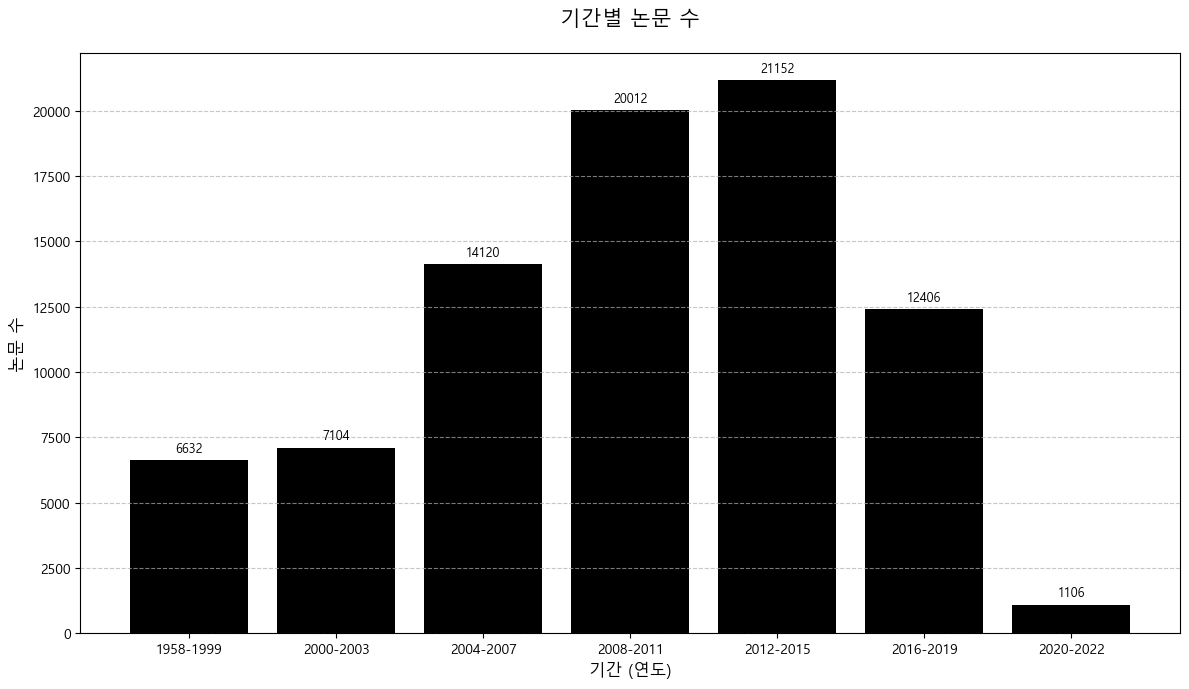


기간별 논문 수:
period
period1     6632
period2     7104
period3    14120
period4    20012
period5    21152
period6    12406
period7     1106
Name: count, dtype: int64

X축 레이블:
['1958-1999', '2000-2003', '2004-2007', '2008-2011', '2012-2015', '2016-2019', '2020-2022']


In [55]:
# 3. 'period' 열 생성
df['period'] = df['year'].apply(assign_period)

# 4. 기간별 논문 수 계산
# 정의된 기간 순서대로 정렬하기 위해 Categorical 타입 사용
period_order = list(period_definitions.keys())
df['period'] = pd.Categorical(df['period'], categories=period_order, ordered=True)
period_counts = df['period'].value_counts().sort_index()

# 5. X축 레이블 생성 (예: '1980-1999')
# period_counts의 인덱스(기간 이름) 순서에 맞춰 레이블 생성
x_labels = [f"{period_definitions[period]['start']}-{period_definitions[period]['end']}"
            for period in period_counts.index]


# 6. 그래프 생성
plt.figure(figsize=(12, 7)) # 그래프 크기 조정
bars = plt.bar(period_counts.index, period_counts.values, color='black') # 막대 그래프 생성

# 각 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + period_counts.max()*0.01, int(yval),
             ha='center', va='bottom', fontsize=9)


# 그래프 제목 및 축 레이블 설정
plt.title('기간별 논문 수', fontsize=15, pad=20) # 제목 수정
plt.xlabel('기간 (연도)', fontsize=12) # x축 레이블 수정
plt.ylabel('논문 수', fontsize=12)

# X축 눈금 레이블을 생성한 연도 범위 레이블로 설정
plt.xticks(ticks=period_counts.index, labels=x_labels, rotation=0, ha='center') # ha='right'로 레이블 정렬 개선

plt.grid(axis='y', linestyle='--', alpha=0.7) # y축 그리드 추가
plt.tight_layout() # 레이아웃 조정

# 그래프 보여주기
plt.show()

# 결과 확인 (기간별 논문 수 및 X축 레이블 출력)
print("\n기간별 논문 수:")
print(period_counts)
print("\nX축 레이블:")
print(x_labels)